In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('../input/fraud-dataaa/Fraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data['step']=data['step'].astype('int32')
data['isFraud']=data['isFraud'].astype('int32')
data['isFlaggedFraud']=data['isFlaggedFraud'].astype('int32')

#so that we can get small sized data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int32  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int32  
 10  isFlaggedFraud  int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 461.2+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.isnull().sum()  #checking misssing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data = data.drop(['nameOrig' , "nameDest" ],axis =1) # we are going to drop these columns because the name and origins ara large data set and not having much relevance in our model

values


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

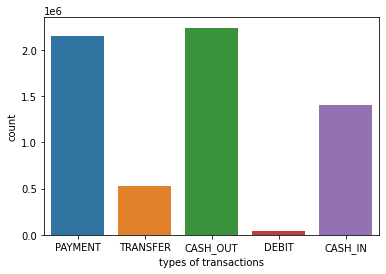

In [10]:
sns.countplot(data['type'])
plt.xlabel("types of transactions")


# the most no. of transactions are in payment and cash out while there are comarably less transation in debit method
print('values')
data['type'].value_counts()

normalized no. of value counts
0    6354407
1       8213
Name: isFraud, dtype: int64
        log plot


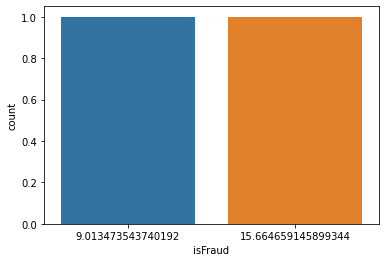

In [11]:
b =np.log(data['isFraud'].value_counts())
sns.countplot(b)


print('normalized no. of value counts')
print(data['isFraud'].value_counts())   # we have very small percentage for fraud transactions
print('        log plot')


In [12]:
'''sns.countplot(data['isFraud'])
plt.xlabel("comparison of frauds")
print('value counts')
data['isFraud'].value_counts() '''

#if you want to see graph in normal values, without log

'sns.countplot(data[\'isFraud\'])\nplt.xlabel("comparison of frauds")\nprint(\'value counts\')\ndata[\'isFraud\'].value_counts() '

value counts


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

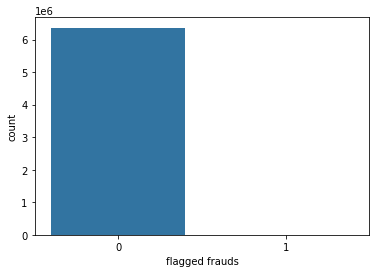

In [13]:
sns.countplot(data['isFlaggedFraud'])
plt.xlabel("flagged frauds")

print('value counts')
data['isFlaggedFraud'].value_counts()

# there is only 0.000251% of flagged fraud values which is negligible for such a huge dataset, thats why i am going to drop this column also

In [14]:
data = data.drop(['isFlaggedFraud'], axis =1)

In [15]:
# visualizing with other columns


In [16]:
out =data.groupby(['type'])['isFraud'].value_counts()
froud  = pd.DataFrame(out)

froud.columns = ['counts']
froud

# from the count values we have clear values that only those type of tranactions are in fraud list which
#only done by using cash_out and transfer method

counts
type     isFraud         
CASH_IN  0        1399284
CASH_OUT 0        2233384
         1           4116
DEBIT    0          41432
PAYMENT  0        2151495
TRANSFER 0         528812
         1           4097

<AxesSubplot:xlabel='type', ylabel='count'>

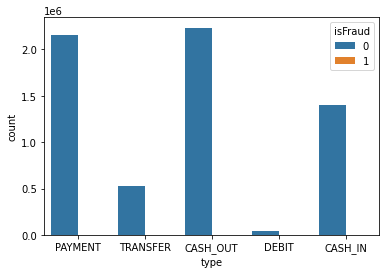

In [17]:
sns.countplot(data['type'], hue = data['isFraud'])

In [18]:
#data['amount'] = (data['oldbalanceOrg'] - data['newbalanceOrig'])

In [19]:
data.set_index('step',inplace =True) #setting index to step

In [20]:
#data

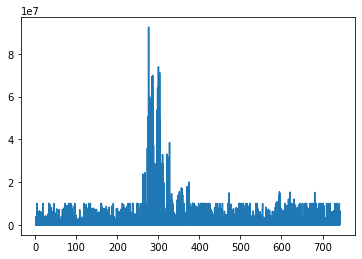

In [21]:
plt.plot(data['amount']) # checking how our amount data is distributed with each step

In [22]:
value =data.groupby(['newbalanceOrig'])['isFraud'].value_counts()

In [23]:
value = pd.DataFrame(value)
value.columns = ['counts']
value

# among the total of 8213 fraud transactions, in 8053 cases the whole amount is removed from the account, so if we see
#such a transaction in whuch the user is trying to take out all his money via transfer or cash_out method
#we can condider that, it could be a fraud transaction

counts
newbalanceOrig isFraud         
0.00           0        3601513
               1           8053
0.01           0              1
0.03           0              1
0.05           0              1
...                         ...
41690842.64    0              1
43673802.21    0              1
43686616.33    0              1
47316255.05    1              1
49585040.37    1              1

[2682587 rows x 1 columns]

In [24]:
# i am going to remove other two columns named ''oldbalanceDest'' and "newbalanceDest" because as mentioned it does not contain information for everyone
# also we already have our required columns which are giving us good knowlegde of fraud transactions

data = data.drop(['oldbalanceDest', 'newbalanceDest'], axis =1)

In [25]:
dummy = pd.get_dummies(data['type'])
#dummy

In [26]:
newdata = pd.concat([data,dummy],axis =1)

In [27]:
newdata.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,,,,,,,,,,
1,PAYMENT,9839.64,170136.0,160296.36,0,0,0,0,1,0
1,PAYMENT,1864.28,21249.0,19384.72,0,0,0,0,1,0
1,TRANSFER,181.00,181.0,0.00,1,0,0,0,0,1
1,CASH_OUT,181.00,181.0,0.00,1,0,1,0,0,0
1,PAYMENT,11668.14,41554.0,29885.86,0,0,0,0,1,0


In [28]:
#newdata.groupby(['TRANSFER'])['isFraud'].value_counts()

In [29]:
# dividing into dependent and independent variables

x= newdata.drop(['isFraud'],axis =1)
y = newdata.isFraud

In [30]:
x['PAYMENT']=x['PAYMENT'].astype('float32')
x['DEBIT']=x['DEBIT'].astype('float32')
x['CASH_OUT']=x['CASH_OUT'].astype('float32')
x['CASH_IN']=x['CASH_IN'].astype('float32')
x['TRANSFER']=x['TRANSFER'].astype('float32')

In [31]:
x=x.drop(['type'],axis =1)

In [32]:
#scaling the features

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
x=minmax.fit_transform(x)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.40,random_state =42)

In [34]:
x_train.shape

(3817572, 8)

In [35]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
print('model score ',model.score(x_test,y_test))
predict = model.predict(x_test)

model score  0.9988027730714706


In [37]:
cross_val = cross_val_score(model,x,y,cv=4)
print('cross val score ',np.mean(cross_val))

cross val score  0.9987580587871034


In [38]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541782
           1       0.97      0.07      0.13      3266

    accuracy                           1.00   2545048
   macro avg       0.99      0.53      0.56   2545048
weighted avg       1.00      1.00      1.00   2545048



In [39]:
'''from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(model, param_grid, cv = 4)
logreg_cv.fit(x, y) '''

#not going for hyperpaameter tuning beacuse we already have 99%-100% accuracy

"from sklearn.model_selection import GridSearchCV\n\nc_space = np.logspace(-5, 8, 15)\nparam_grid = {'C': c_space}\n\nlogreg_cv = GridSearchCV(model, param_grid, cv = 4)\nlogreg_cv.fit(x, y) "

In [40]:
final_data = pd.DataFrame(y_test)
final_data['predict'] = predict
final_data['actual']  = y_test
final_data.head()

,isFraud,predict,actual
step,,,
278,0,0,0
15,0,0,0
10,0,0,0
403,0,0,0
206,0,0,0


In [41]:
# if someone wants to see features and predicted value 

'''l=[]
for i in range(100):
    z=(x[i], predict[i])
    l.append(z)
pd.DataFrame(l) '''

'l=[]\nfor i in range(100):\n    z=(x[i], predict[i])\n    l.append(z)\npd.DataFrame(l) '

In [42]:
#model.predict([x_test[0]])

In [43]:
y_test.value_counts()

0    2541782
1       3266
Name: isFraud, dtype: int64

In [44]:
#confusion matrix

In [45]:
conf_matrix = confusion_matrix(y_test,predict)
conf_matrix

array([[2541776,       6],
       [   3041,     225]])

<AxesSubplot:>

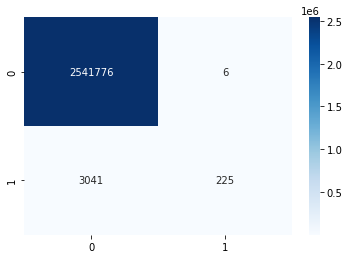

In [46]:
sns.heatmap(conf_matrix, annot =True,fmt='',cmap = 'Blues')

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

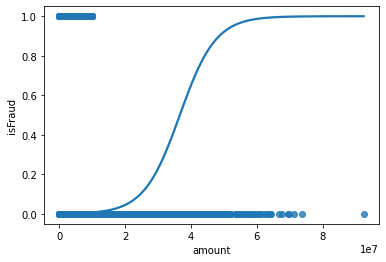

In [47]:
sns.regplot(x=data['amount'], y=y, data=data, logistic=True, ci=None)

In [48]:
newdata =newdata.drop(['type','isFraud'],axis =1)
newdata.head(1)

,amount,oldbalanceOrg,newbalanceOrig,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,,,,,,,,
1,9839.64,170136.0,160296.36,0,0,0,1,0


In [49]:
importance = model.coef_
importance =importance.reshape(-1,1)

In [50]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# hence we can say we have oldbalanceOrig is the most important feature

Feature: 0, Score: 5.70295
Feature: 1, Score: 51.85605
Feature: 2, Score: -15.79511
Feature: 3, Score: -9.19793
Feature: 4, Score: 7.05178
Feature: 5, Score: -0.04609
Feature: 6, Score: -6.14880
Feature: 7, Score: 8.38732
